In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [14]:
PATH = "lab/data/"
df_raw = pd.read_csv(f'{PATH}Credit.csv')
df = df_raw.drop("Unnamed: 0", axis=1)
df.isnull().sum()  # looking for nulls

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

## Exercise a)

In [15]:
df['aristocrat'] = df.apply(lambda row: 1 if row['Income'] > 50 else 0, axis=1)  # making new column
df = pd.get_dummies(df)  # one hot encoding for category data

In [16]:
df.head(n=5)

,Income,Limit,Rating,Cards,Age,Education,Balance,aristocrat,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,1,0,1,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,903,1,0,1,0,1,0,1,0,1,0
2,104.593,7075,514,4,71,11,580,1,1,0,1,0,1,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,1,1,0,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,1,1,0,1,0,0,1,0,0,1


<AxesSubplot: xlabel='index', ylabel='aristocrat'>

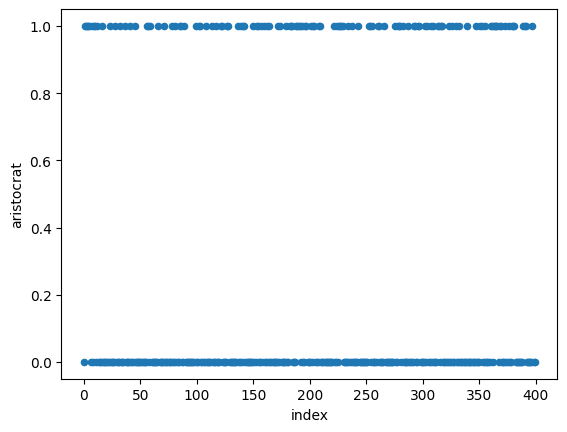

In [17]:
df.reset_index().plot(x='index', y='aristocrat', kind='scatter')

In [18]:
# splitting to train and test sets
df_y = df.pop('aristocrat')

X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2)
X_train.head(n=5)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
93,16.479,5435,388,2,26,16,937,1,0,1,0,1,0,1,0,0
23,64.027,5179,398,5,48,8,411,1,0,1,0,0,1,1,0,0
299,24.919,5051,372,3,76,11,711,0,1,1,0,0,1,1,0,0
13,43.682,6922,511,1,49,9,1081,1,0,1,0,0,1,0,0,1
90,20.191,5767,431,4,42,16,1023,1,0,1,0,0,1,1,0,0


In [22]:
# training on all predictors
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
print('Model test score: ', log_reg.score(X_test, y_test))

# log_reg.predict_proba(X_test)

Model test score:  1.0


In [24]:
# training on only two predictors
X_2f_train = X_train[['Income', 'Limit']]
X_2f_test = X_test[['Income', 'Limit']]
# X_2f_train.head()
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_2f_train, y_train)
print('Model test score [Income, Limit]: ', log_reg.score(X_2f_test, y_test))

Model test score [Income, Limit]:  1.0


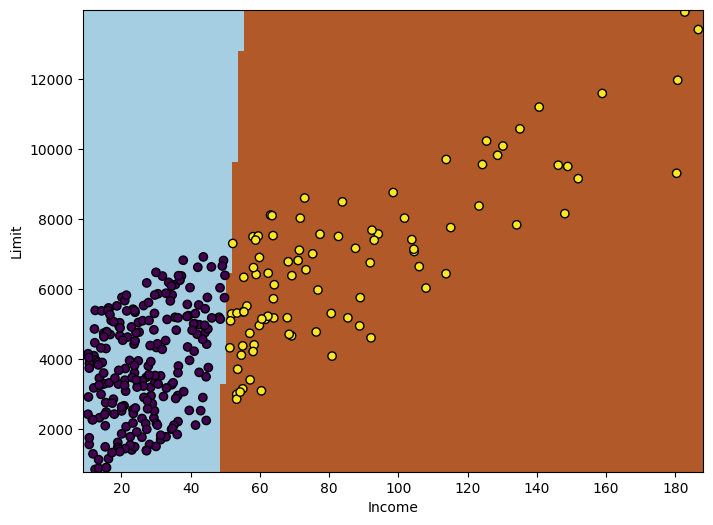

In [25]:
_, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    log_reg,
    X_2f_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Income",
    ylabel="Limit",
    eps=0.5,
)

plt.scatter(X_2f_train['Income'], X_2f_train['Limit'], c=y_train, edgecolors="k")

plt.show()

## Exercise b)

<AxesSubplot: xlabel='index', ylabel='Cards'>

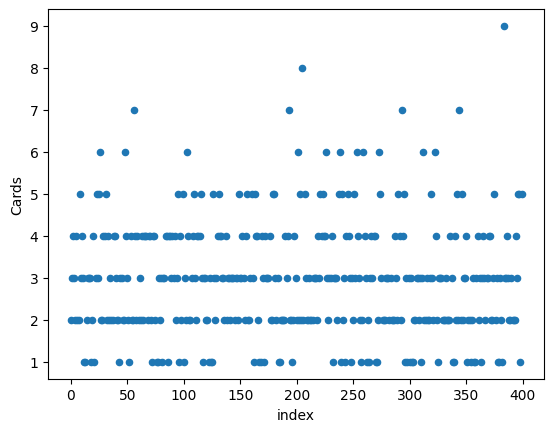

In [50]:
PATH = "lab/data/"
df_raw = pd.read_csv(f'{PATH}Credit.csv')
df = df_raw.drop("Unnamed: 0", axis=1)
df = pd.get_dummies(df)  # one hot encoding for category data
df.reset_index().plot(x='index', y='Cards', kind='scatter')

In [51]:
df_y = df.pop('Cards')
X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2)
# training on all predictors
log_reg = LogisticRegression(max_iter=100000000, solver="sag")
log_reg.fit(X_train, y_train)
print('Model test score: ', log_reg.score(X_test, y_test))

Model test score:  0.3375


In [67]:
y_train.isnull().any()
X_train = X_train.fillna(lambda x: x.median())
X_train.describe()
X_train.isnull().sum()


Income                        0
Limit                         0
Rating                        0
Age                           0
Education                     0
Balance                       0
Gender_ Male                  0
Gender_Female                 0
Student_No                    0
Student_Yes                   0
Married_No                    0
Married_Yes                   0
Ethnicity_African American    0
Ethnicity_Asian               0
Ethnicity_Caucasian           0
dtype: int64

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

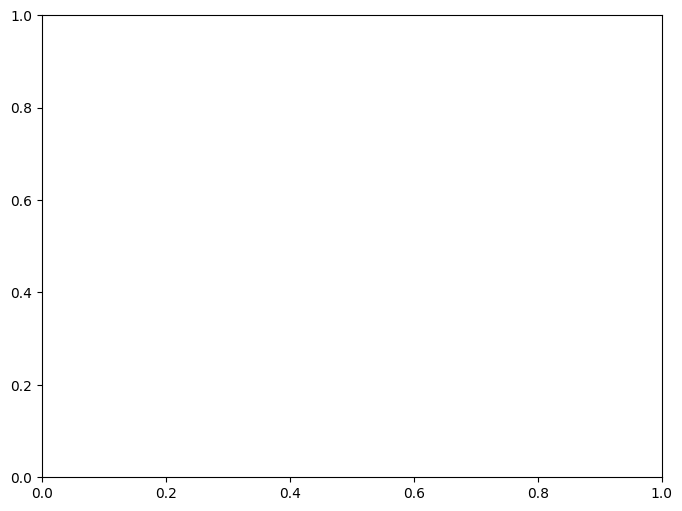

In [63]:
# _, ax = plt.subplots(figsize=(8, 6))
# DecisionBoundaryDisplay.from_estimator(
#     estimator=log_reg,
#     X=X_test,
#     cmap=plt.cm.Paired,
#     ax=ax,
#     response_method="predict",
#     plot_method="pcolormesh",
#     shading="auto",
#     xlabel="Income",
#     ylabel="Limit",
#     eps=0.5,
# )
#
# plt.scatter(X_test['Income'], X_test['Limit'], c=y_test, edgecolors="k")
#
# plt.show()